In [1]:
# common import
import numpy as np
import matplotlib.pyplot as plt
import torch
import time

from dataset_handling import *
from collections import deque


# Dataset drawings

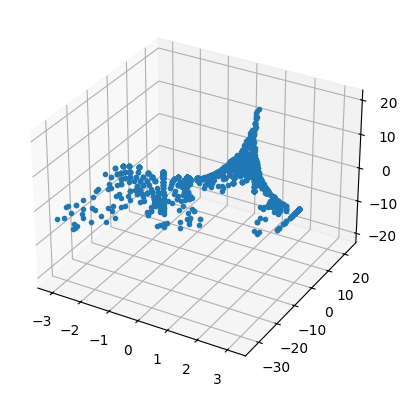

In [2]:
EXP_NAME = "P0_C0"
dataset_path = f"/home/jmartinsaquet/Documents/code/IA2_codes/clone/datasets/{EXP_NAME}.csv"

xd, yd, _, traj = read_dataset(dataset_path, "vec", with_angle=True, lag_amout=0)

ax = plt.figure().add_subplot(projection='3d')

ax.plot(xd['angle_tan'], xd['dx'], xd['dy'], '.')



         dx    dy
0    -11.78 -1.38
1    -11.76 -1.38
2    -11.70 -1.38
3    -11.60 -1.34
4    -11.50 -1.34
...     ...   ...
1231   0.00  0.00
1232   0.00  0.00
1233   0.00  0.00
1234   0.00  0.00
1235   0.00  0.00

[1236 rows x 2 columns]


np.float64(11.9)

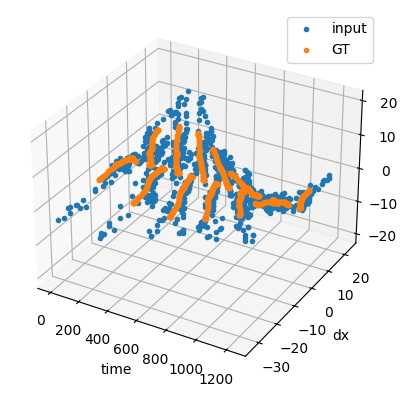

In [3]:
print(yd)


n = [i for i in xd.index]
ax = plt.figure().add_subplot(projection='3d')

ax.plot(n, xd['dx'], xd['dy'], '.', label = 'input')
ax.plot(n, yd['dx'], yd['dy'], '.', label = 'GT')
ax.set_xlabel("time")
ax.set_ylabel("dx")
ax.set_zlabel("dy")
ax.legend()

np.max(yd)

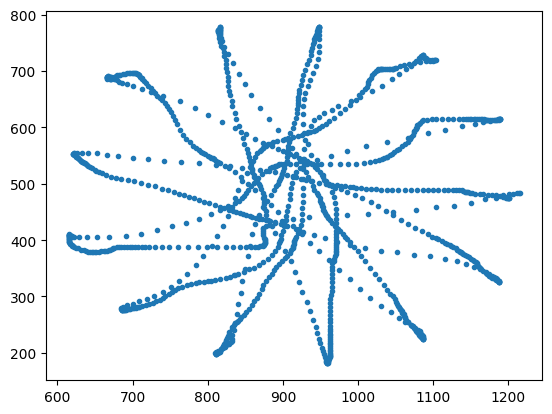

In [4]:
plt.plot(traj['x'], traj["y"], '.')

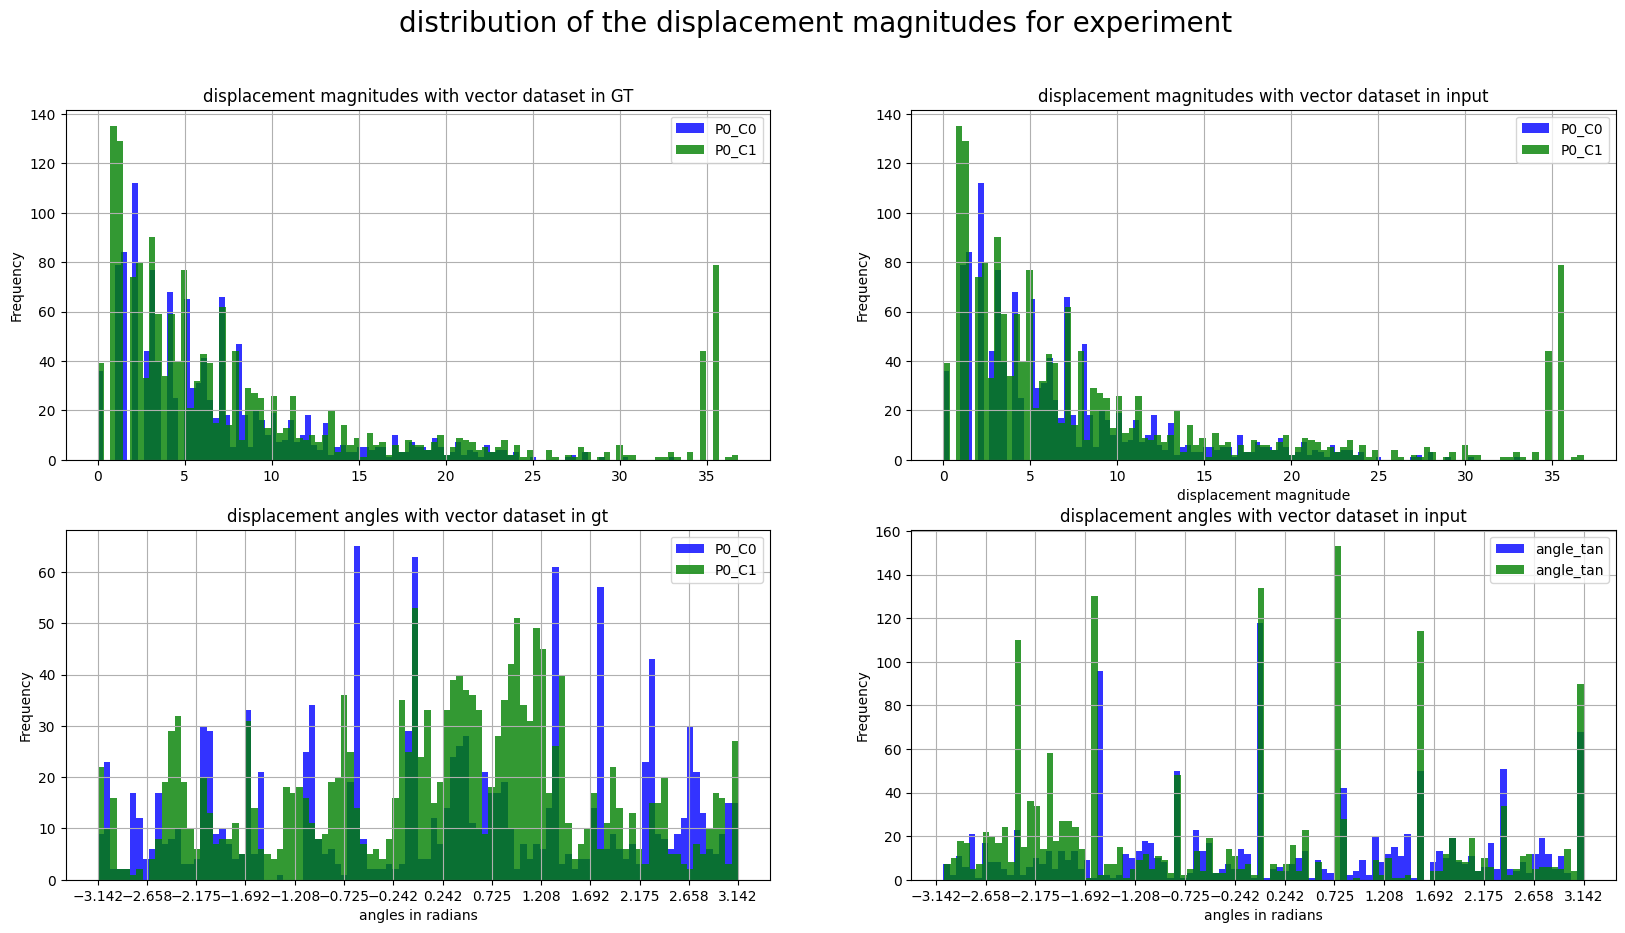

In [5]:
fig, axs = plt.subplots(2,2, figsize=(20,10))
fig.suptitle(f'distribution of the displacement magnitudes for experiment {EXP_NAME}', fontsize=20)


def draw_hist(axs, xd, yd, label, color = 'g'):

    a = 0.8 # alpha
    bins = 100
    mag_gt_df = np.sqrt(yd['dx']**2 + yd['dy']**2)
    axs[0,0] = mag_gt_df.plot.hist(alpha=a, bins=bins, ax=axs[0,0], color=color, label=label)
    axs[0,0].set_title("displacement magnitudes with vector dataset in GT")
    axs[0,1].set_xlabel("displacement magnitude")

    mag_in_df = np.sqrt(xd['dx']**2 + xd['dy']**2)
    axs[0,1] = mag_in_df.plot.hist(alpha=a, bins=bins, ax=axs[0,1], color=color, label=label)
    axs[0,1].set_title("displacement magnitudes with vector dataset in input")
    axs[0,1].set_xlabel("displacement magnitude")

    axs[1,1] = xd.plot.hist(column=['angle_tan'], alpha=a, bins=bins, ax=axs[1,1], color=color, label=label)
    axs[1,1].set_title("displacement angles with vector dataset in input")
    axs[1,1].set_xlabel("angles in radians")


    ang_gt_df = np.atan2(yd['dy'], yd['dx'])
    axs[1,0] = ang_gt_df.plot.hist(alpha=a, bins=bins, ax=axs[1,0], color=color, label=label)
    axs[1,0].set_title("displacement angles with vector dataset in gt")
    axs[1,0].set_xlabel("angles in radians")

    for ax in axs.flatten():
        ax.grid(True)
        ax.legend()

    N = 13
    custom_ticks = [-np.pi + i*np.pi/(N/2) for i in range(0, N+1)]
    custom_tick_labels = ['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$']

    for ax in axs[1].flatten():
        ax.set_xticks(custom_ticks)



fig.suptitle(f'distribution of the displacement magnitudes for experiment', fontsize=20)

experiment_to_dive_in = ['P0_C0', 'P0_C1']
color = ['b', 'g']
for exp, c in zip(experiment_to_dive_in, color):
    dataset_path = f"/home/jmartinsaquet/Documents/code/IA2_codes/clone/datasets/{exp}.csv"
    xe, ye, _, _ = read_dataset(dataset_path, "dir", with_angle=True, lag_amout=0)
    draw_hist(axs, xe, ye, exp, c)

,dx,dy
0,-11.78,-1.38
1,-11.76,-1.38
2,-11.70,-1.38
3,-11.60,-1.34
4,-11.50,-1.34
...,...,...
1231,0.00,0.00
1232,0.00,0.00
1233,0.00,0.00
1234,0.00,0.00


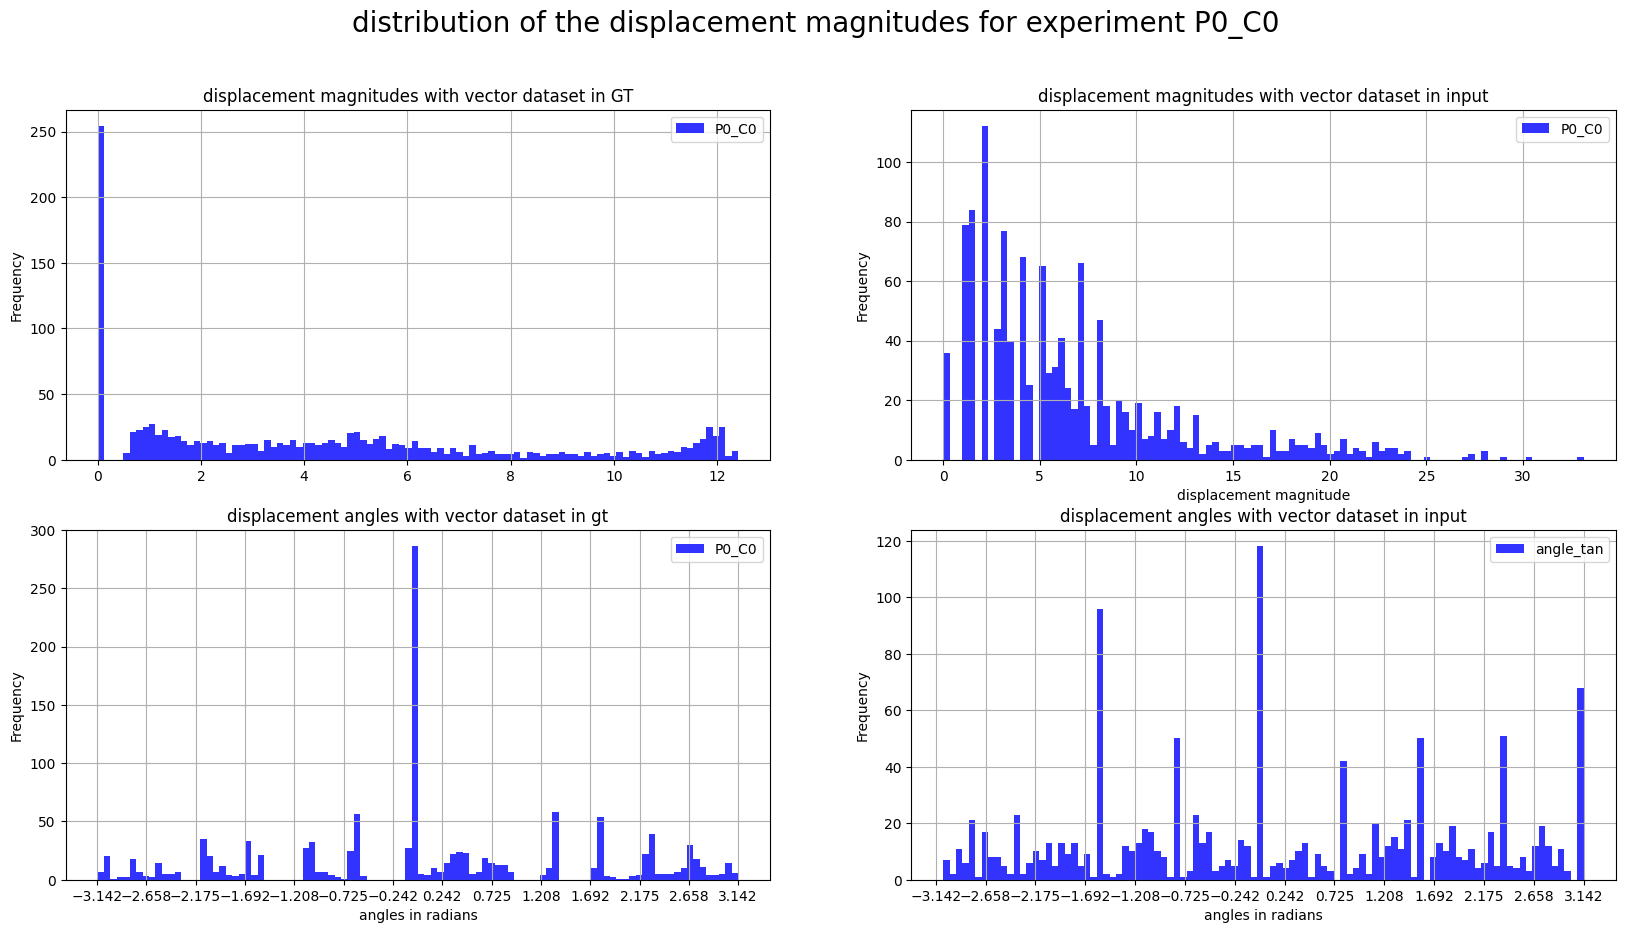

In [6]:
fig, axs = plt.subplots(2,2, figsize=(20,10))
fig.suptitle(f'distribution of the displacement magnitudes for experiment {EXP_NAME}', fontsize=20)

experiment_to_dive_in = [ 'P0_C0']
color = ['b', 'g']
for exp, c in zip(experiment_to_dive_in, color):
    dataset_path = f"/home/jmartinsaquet/Documents/code/IA2_codes/clone/datasets/{exp}.csv"
    xe, ye, _ , _= read_dataset(dataset_path, "vec", with_angle=True, lag_amout=0)
    draw_hist(axs, xe, ye, exp, c)


yd

/home/jmartinsaquet/Documents/code/IA2_codes/corrector_training_repo/src/dataset/dataset_handling.py:202: RuntimeWarning: divide by zero encountered in divide
  x["c"] = dtheta / ds
/home/jmartinsaquet/Documents/code/IA2_codes/corrector_training_repo/src/dataset/dataset_handling.py:202: RuntimeWarning: invalid value encountered in divide
  x["c"] = dtheta / ds
/home/jmartinsaquet/Documents/code/IA2_codes/corrector_training_repo/src/dataset/dataset_handling.py:202: RuntimeWarning: divide by zero encountered in divide
  x["c"] = dtheta / ds
/home/jmartinsaquet/Documents/code/IA2_codes/corrector_training_repo/src/dataset/dataset_handling.py:202: RuntimeWarning: invalid value encountered in divide
  x["c"] = dtheta / ds


dx            True
dy            True
dt            True
angle_tan     True
vx            True
vy           False
v             True
a             True
j             True
c            False
w            False
dtype: bool


0       3.141593
1       0.000000
2      -1.096100
3       1.180536
4      -0.732240
          ...   
1231   -0.555360
1232    0.785398
1233    0.000000
1234    0.000000
1235    0.000000
Name: c, Length: 1236, dtype: float64

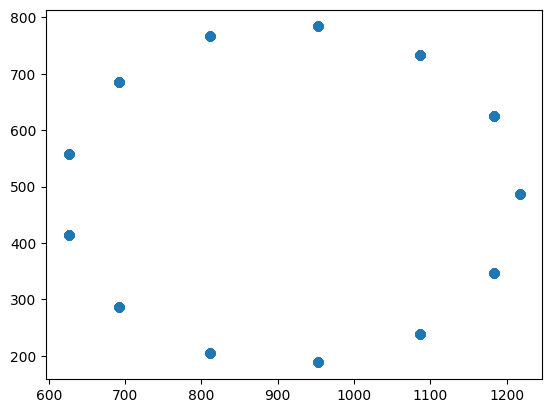

In [15]:
# dump dataset for a specific experiment to be used by other soft


dataset_path = f"/home/jmartinsaquet/Documents/code/IA2_codes/clone/datasets/P0_C0.csv"
dump_dir = f"/home/jmartinsaquet/Documents/code/dataset_test/"
GT = ['vec', 'dir']
for gt in GT:
    x, y, targets , _= read_dataset(dataset_path, gt, with_angle=True, lag_amout=0, full_dataset=True)

    x.to_csv(dump_dir + f"P0_C0_x_{gt}.csv", index=False)
    y.to_csv(dump_dir + f"P0_C0_y_{gt}.csv", index=False)

plt.plot(targets['x_to'], targets['y_to'], 'o')
targets



print(np.isfinite(x).all())
np.where(np.isfinite(x).all())[0]

x.iloc[np.where(np.isfinite(x).all())[0]]
x['c']

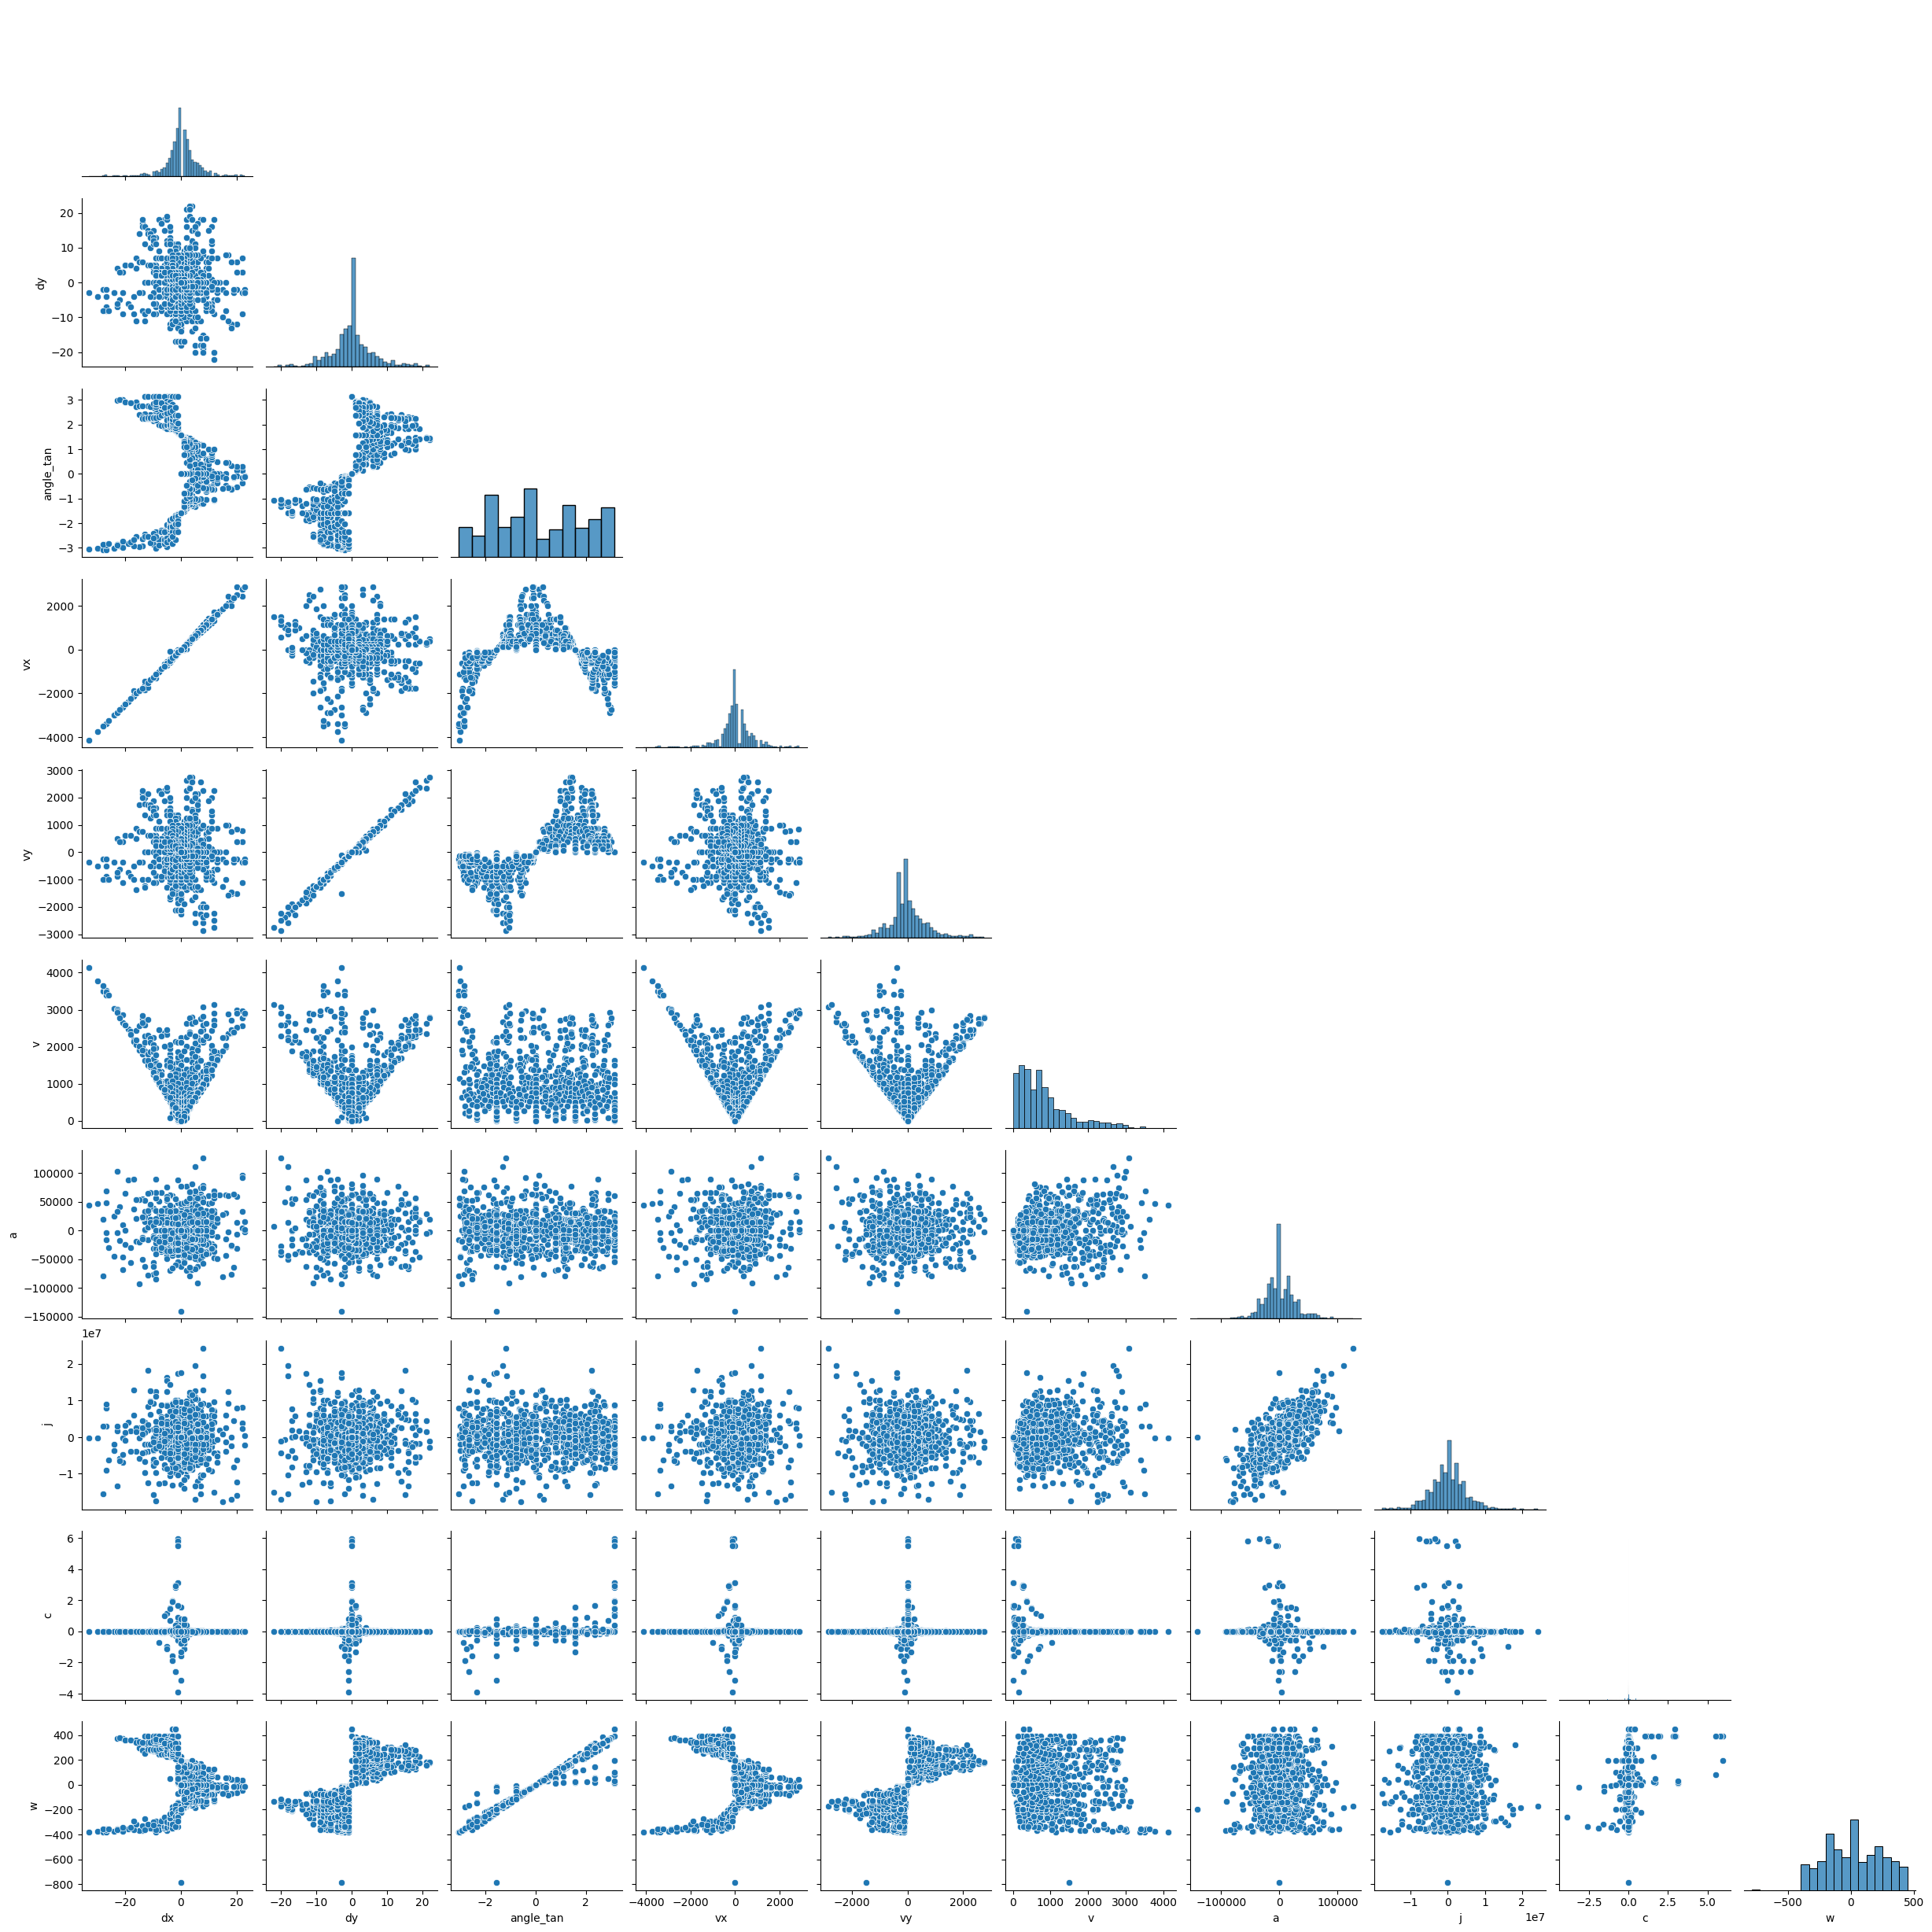

In [8]:
# let say my screen is 1920x1080
#and the screen is 20cmx34cm
# hence a pixel is 0.01770833333cm * 0.01770833333cm
# fig, axs = plt.subplots(2,1)

# ax = axs[0]

# t = np.cumsum(x["dt"])


# ax.plot(x["v"]*0.00017)
# # axs[1].plot(x["a"]*0.00017)
# ax.plot(x["c"]*0.00017)
# plt.show()
# 
    
import seaborn as sns
sns.pairplot(x.drop("dt", axis=1), corner=True)

